# Simulations of the pulsed Schaefer model

This notebook aims to be easily executable, by entring the parameters once for all, for the pulsed Schaefer model. If we want to see other conditions, we only need to change the parameters at the top of the notebook.

In [8]:
#Import librairies
import numpy as np
import matplotlib.pyplot as plt

#Import the module and make it reload each time there is a change 
import importlib
import schaefer
importlib.reload(schaefer)

<module 'schaefer' from '/run/netsop/u/home-sam/home/aloyens/Internship_CACOLAC/sim_models/First_sim_CACOLAC/schaefer.py'>

In [9]:
#Set the parameters that will be used all along the code
r = 0.5
K = 10 

E = 0.1
T = 5

t_0 = 0
t_n = 100

## Initial values

I discovered that to be biologically realistic, we need to have $r>E$

Here is the proof:  
The initial value of the periodic solution is
\begin{equation*}  
x^{*}(kT^{+}) = \frac{e^{-ET}Ke^{rT} - K}{e^{rT} - 1} 
\end{equation*}   
To be realistic, the numerator should be positive, so:  
\begin{equation*}
e^{-ET}Ke^{rT} > K
\end{equation*}

\begin{equation*}
e^{-ET}e^{rT} > 1
\end{equation*}

\begin{equation*}
e^{(r-E)T} > 1
\end{equation*}

\begin{equation*}
r > E
\end{equation*}


In [10]:
#Initial value of the periodic solution
x_star = ( np.exp(-E*T) * K * np.exp(r*T)  -  K ) / ( np.exp(r*T) - 1 ) 
print(x_star)

5.71344471222833


In [11]:
#Other initial values but the periodic solution
x0_a = 4
x0_b = 3
x0_c = 7
x0_d = 8


## Solve ODE

In [12]:
sol_p = schaefer.solve_schaefer_model(x_star, r, K, E, T, t_0, t_n)
x_p = sol_p[1]


sol_a = schaefer.solve_schaefer_model(x0_a, r, K, E, T, t_0, t_n)
x_a = sol_a[1]

sol_b = schaefer.solve_schaefer_model(x0_b, r, K, E, T, t_0, t_n)
x_b = sol_b[1]

sol_c = schaefer.solve_schaefer_model(x0_c, r, K, E, T, t_0, t_n)
x_c = sol_c[1]

sol_d = schaefer.solve_schaefer_model(x0_d, r, K, E, T, t_0, t_n)
x_d = sol_d[1]

## Plot results

In [13]:
#time points
t = sol_p[0]

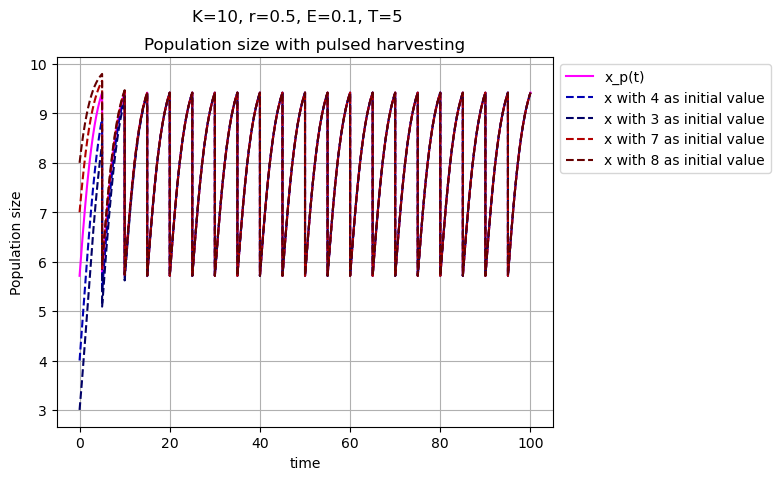

In [14]:
plt.plot(t, x_p, color = (1,0,1), label = 'x_p(t)')
plt.plot(t, x_a, color = (0,0,0.7), linestyle='--', label = f'x with {x0_a} as initial value')
plt.plot(t, x_b, color = (0,0,0.4), linestyle='--', label = f'x with {x0_b} as initial value')
plt.plot(t, x_c, color = (0.7,0,0), linestyle='--', label = f'x with {x0_c} as initial value')
plt.plot(t, x_d, color = (0.4,0,0), linestyle='--', label = f'x with {x0_d} as initial value')
plt.xlabel('time')
plt.ylabel('Population size')
plt.title('Population size with pulsed harvesting')
plt.suptitle(f'{K=}, {r=}, {E=}, {T=}')
plt.legend(loc= 'upper left', bbox_to_anchor=(1,1))
plt.grid()
plt.show()